### MNIST

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(5)

In [2]:
# 데이터 가져오기

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)  = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (10000, 28, 28)
<class 'numpy.ndarray'> (10000,)
5


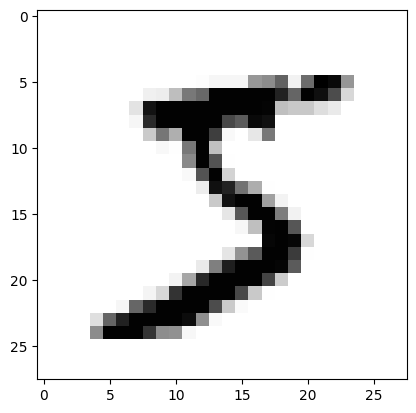

In [3]:
# 이미지 출력

def show_one_image(n):
    print(type(x_train), x_train.shape)
    print(type(y_train), y_train.shape)
    print(type(x_test), x_test.shape)
    print(type(y_test), y_test.shape)
    
    image = x_train[n]
    print(y_train[n])
    
    plt.imshow(image, cmap = 'Greys')
    plt.show()

show_one_image(0)    

In [4]:
# X값의 shape을 2차원으로 변환

x_train = x_train.reshape(-1 ,28*28)
x_test = x_test.reshape(-1, 28*28)

# X값의 타입을 float형으로 변환

x_train = tf.cast(x_train, dtype = tf.float32)
x_test = tf.cast(x_test, dtype = tf.float32)

print(x_train.shape, x_train.dtype)
print(x_test.shape, x_test.dtype)

Metal device set to: Apple M2
(60000, 784) <dtype: 'float32'>
(10000, 784) <dtype: 'float32'>


2023-07-13 01:04:29.620363: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-13 01:04:29.620450: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# One-hot Encoding

nb_classes = 10

Y_one_hot = tf.one_hot(y_train, nb_classes)  
print(Y_one_hot.shape)

(60000, 10)


In [6]:
# Layer 1: 은닉층(Hidden Layer)

W1 = tf.Variable(tf.random.normal([784, 512]), name = 'weight1')
b1 = tf.Variable(tf.random.normal([512]), name = 'bias1')

def layer1(X):
    return  tf.nn.relu(tf.matmul(X, W1) + b1) 

In [7]:
# Layer 2: 은닉층(Hidden Layer)

W2 = tf.Variable(tf.random.normal([512, 512]), name = 'weight2')
b2 = tf.Variable(tf.random.normal([512]), name = 'bias2')

def layer2(X):
    return  tf.nn.relu(tf.matmul(layer1(X), W2) + b2) 

In [8]:
# Layer 3: 은닉층(Hidden Layer)

W3 = tf.Variable(tf.random.normal([512, 512]), name = 'weight3')
b3 = tf.Variable(tf.random.normal([512]), name = 'bias3')

def layer3(X):
    return  tf.nn.relu(tf.matmul(layer2(X), W3) + b3) 

In [9]:
# Layer 4: 출력층(Output Layer)

W4 = tf.Variable(tf.random.normal([512, nb_classes]), name = 'weight4')
b4 = tf.Variable(tf.random.normal([nb_classes]), name = 'bias4')

In [10]:
# 예측 함수

def logits(X):
    return tf.matmul(layer3(X), W4) + b4

def hypothesis(X):
    return tf.nn.softmax(logits(X)) 

In [11]:
# 경사 하강법

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)

In [12]:
# 학습

training_epoch = 25
batch_size = 60

print('***** Start Learning!!')
for epoch in range(training_epoch):
    avg_cost = 0
    total_batch = int(x_train.shape[0]/batch_size)
    
    for k in range(total_batch):
        batch_xs = x_train[0 + k*batch_size:batch_size + k*batch_size]
        batch_ys = Y_one_hot[0 + k*batch_size:batch_size + k*batch_size]
        
# 비용 함수        
        def cost_func_batch():
            cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits(batch_xs),
                                             labels = batch_ys)
            cost =  tf.reduce_mean(cost_i)
            return cost
        
        optimizer.minimize(cost_func_batch, var_list=[W1, b1, W2, b2, W3, b3, W4, b4])
        avg_cost += cost_func_batch().numpy()/total_batch
            
    print('Epoch:', '%04d'%(epoch + 1), 'cost:', '{:.9f}'.format(avg_cost))
             
print('***** Learning Finished!!')

***** Start Learning!!
Epoch: 0001 cost: 169463.912568573
Epoch: 0002 cost: 17463.762289787
Epoch: 0003 cost: 8005.149878051
Epoch: 0004 cost: 4529.961570140
Epoch: 0005 cost: 2961.959557719
Epoch: 0006 cost: 1811.477714528
Epoch: 0007 cost: 985.915369705
Epoch: 0008 cost: 273.284070916
Epoch: 0009 cost: 17.419010537
Epoch: 0010 cost: 5.323030195
Epoch: 0011 cost: 2.652303656
Epoch: 0012 cost: 2.127158170
Epoch: 0013 cost: 2.168779647
Epoch: 0014 cost: 2.171370775
Epoch: 0015 cost: 2.166418628
Epoch: 0016 cost: 2.232538044
Epoch: 0017 cost: 2.239919099
Epoch: 0018 cost: 2.294268820
Epoch: 0019 cost: 2.295803289
Epoch: 0020 cost: 2.295802998
Epoch: 0021 cost: 2.295802885
Epoch: 0022 cost: 2.295802836
Epoch: 0023 cost: 2.295802835
Epoch: 0024 cost: 2.295802821
Epoch: 0025 cost: 2.295802822
***** Learning Finished!!


In [13]:
# 평가

Y_one_hot = tf.one_hot(y_test, nb_classes)  
print(Y_one_hot.shape)

def predict(X):
    return tf.argmax(hypothesis(X), axis = 1)

correct_predict = tf.equal(predict(x_test), tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predict, dtype = tf.float32))
print('Accuracy:', accuracy.numpy())

(10000, 10)
Accuracy: 0.104499996


In [14]:
# 예측

print('***** Predict')
pred = predict(x_test).numpy()
print('', pred[:100], '\n', y_test[:100])

***** Predict
 [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7] 
 [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


random =  9812 Label: 3
Prediction :  [7]


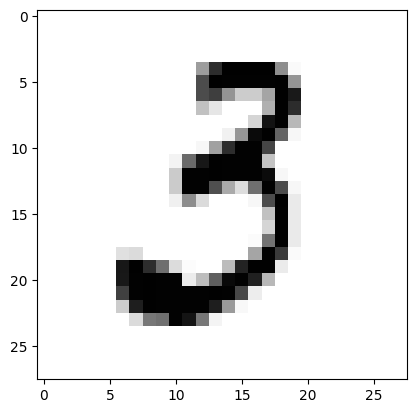

In [15]:
# 임의의 test 데이터로 예측한 값 시각화

r = np.random.randint(0, x_test.shape[0] - 1)

print('random = ', r, 'Label:', y_test[r])
print('Prediction : ', predict(x_test[r:r+1]).numpy())

image = tf.reshape(x_test[r], (28,28))
plt.imshow(image, cmap = 'Greys')
plt.show()